In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import Request, urlopen

In [2]:
price_url = "https://etherscan.io/chart/etherprice?output=csv"
market_capitalization_url = "https://etherscan.io/chart/marketcap?output=csv"
supply_growth_url = "https://etherscan.io/chart/ethersupplygrowth?output=csv"
daily_transactions_url = "https://etherscan.io/chart/tx?output=csv"
daily_token_transfer_url = "https://etherscan.io/chart/tokenerc-20txns?output=csv"
unique_address_url = "https://etherscan.io/chart/address?output=csv"
avg_block_size_url = "https://etherscan.io/chart/blocksize?output=csv"
avg_block_time_url = "https://etherscan.io/chart/blocktime?output=csv"
avg_gas_price_url = "https://etherscan.io/chart/gasprice?output=csv"
avg_gas_limit_url = "https://etherscan.io/chart/gaslimit?output=csv"
daily_gas_used_url = "https://etherscan.io/chart/gasused?output=csv"
daily_block_reward_url = "https://etherscan.io/chart/blockreward?output=csv"
block_count_rewards_url = "https://etherscan.io/chart/blocks?output=csv"
uncle_count_rewards_url = "https://etherscan.io/chart/uncles?output=csv"
net_hashrte_url = "https://etherscan.io/chart/hashrate?output=csv"
net_difficulty_url = "https://etherscan.io/chart/difficulty?output=csv"
pending_transactions_url = "https://etherscan.io/chart/pendingtx?output=csv"
net_transaction_fee_url = "https://etherscan.io/chart/transactionfee?output=csv"
net_utilization_url = "https://etherscan.io/chart/networkutilization?output=csv"
daily_verified_contracts_url = "https://etherscan.io/chart/verified-contracts?output=csv"

In [3]:
def read_data(url):
  req = Request(url)
  req.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0')
  content = urlopen(req)

  return pd.read_csv(content)
url_list = [
              ("price", price_url),
              ("market cap.", market_capitalization_url),
              ("supply growth", supply_growth_url),
              ("daily trans.", daily_transactions_url),
              ("daily token trans.", daily_token_transfer_url),
              ("uniq. address", unique_address_url),
              ("avg blk size", avg_block_size_url),
              ("avg blk time", avg_block_time_url),
              ("avg gas price", avg_gas_price_url),
              ("avg gas limit", avg_gas_limit_url),
              ("daily gas used", daily_gas_used_url),
              ("daily blk reward", daily_block_reward_url),
              ("blk count reward", block_count_rewards_url),
              ("uncle count reward", uncle_count_rewards_url),
              ("net hashrte", net_hashrte_url),
              ("net diff.", net_difficulty_url),
              # ("pending trans.", pending_transactions_url),
              ("net trans. fee", net_transaction_fee_url),
              ("net util.", net_utilization_url),
              # ("daily verified contracts", daily_verified_contracts_url),
]


In [4]:
df_list = []
for column_name, url in url_list:
  df = read_data(url)
  df["Date(UTC)"] = pd.to_datetime(df["Date(UTC)"]).dt.strftime('%m/%d/%Y')

  if "UnixTimeStamp" in df.columns:
    df = df.drop("UnixTimeStamp", 1)
    
  if "Value" in df.columns:
    df = df.rename(columns={"Value": column_name})

  df_list.append(df)
from functools import reduce


C:\Users\jcsar\AppData\Local\Temp/ipykernel_4252/2662321159.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop("UnixTimeStamp", 1)


In [5]:
df_total = reduce(lambda df1, df2: pd.merge(df1, df2, on='Date(UTC)'), df_list)
df_total = df_total.rename(columns={"Value (Wei)": "avg gas price"})
df_total

,Date(UTC),price,Supply,MarketCap,Price,supply growth,daily trans.,No. of ERC20 Token Transfers,uniq. address,avg blk size,...,avg gas price,avg gas limit,daily gas used,daily blk reward,blk count reward,uncle count reward,net hashrte,net diff.,net trans. fee,net util.
0,07/30/2015,0.00,7.204931e+07,0.000000,0.00,7.204931e+07,8893,0,9205,644,...,0,0,0,39316.09375,6912,1299,1.152970e+01,0.121,0,0.0000
1,07/31/2015,0.00,7.208550e+07,0.000000,0.00,7.208550e+07,0,0,9361,582,...,0,0,0,36191.71875,6863,511,5.145940e+01,0.603,0,0.0000
2,08/01/2015,0.00,7.211320e+07,0.000000,0.00,7.211320e+07,0,0,9476,575,...,0,0,0,27705.93750,5293,334,5.778450e+01,0.887,0,0.0000
3,08/02/2015,0.00,7.214143e+07,0.000000,0.00,7.214143e+07,0,0,9563,581,...,0,0,0,28223.43750,5358,394,6.792240e+01,1.020,0,0.0000
4,08/03/2015,0.00,7.216940e+07,0.000000,0.00,7.216940e+07,0,0,9639,587,...,0,0,0,27976.71875,5280,443,7.457370e+01,1.126,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492,05/26/2022,1791.00,1.209364e+08,216597.056748,"1,791.00",1.191609e+08,1071180,498276,197215341,112811,...,51376731735,29997359,94097522333,12825.25000,6092,364,1.064457e+06,14245.515,677828608265622505753,0.5149
2493,05/27/2022,1724.73,1.209494e+08,208605.051386,"1,724.73",1.191718e+08,1093469,511327,197292722,99428,...,45548286421,29996377,95872773180,13015.68750,6218,327,1.103869e+06,14572.081,643553662769716640496,0.5140
2494,05/28/2022,1790.79,1.209623e+08,216618.047165,"1,790.79",1.191845e+08,1069802,508402,197378453,96247,...,23604617235,29999373,95084172922,12887.43750,6166,311,1.071542e+06,14293.848,412407688341884392997,0.5140
2495,05/29/2022,1811.69,1.209752e+08,219169.487677,"1,811.69",1.191971e+08,1065407,452727,197473739,112140,...,24161086427,29998745,95178248082,12876.81250,6157,317,1.088666e+06,14528.994,405505002686422664234,0.5153


In [6]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2497 entries, 0 to 2496
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date(UTC)                     2497 non-null   object 
 1   price                         2497 non-null   float64
 2   Supply                        2497 non-null   float64
 3   MarketCap                     2497 non-null   float64
 4   Price                         2497 non-null   object 
 5   supply growth                 2497 non-null   float64
 6   daily trans.                  2497 non-null   int64  
 7   No. of ERC20 Token Transfers  2497 non-null   int64  
 8   uniq. address                 2497 non-null   int64  
 9   avg blk size                  2497 non-null   int64  
 10  avg blk time                  2497 non-null   float64
 11  avg gas price                 2497 non-null   int64  
 12  avg gas limit                 2497 non-null   int64  
 13  dai

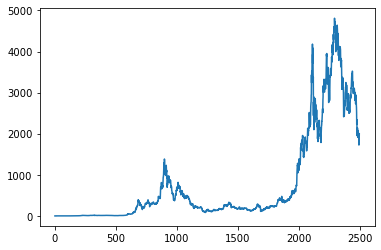

In [7]:
df_total["price"].plot()
plt.show()

In [8]:
import tensorflow as tf

# df_months = pd.to_datetime(df_total["Date(UTC)"]).dt.strftime('%m').astype("int16")
# df_days = pd.to_datetime(df_total["Date(UTC)"]).dt.strftime('%d').astype("int16")
# months = pd.DataFrame(tf.keras.utils.to_categorical(df_months)[:, 1:], columns=["Month "+str(i) for i in range(1, 13)]).astype("int")
# days = pd.DataFrame(tf.keras.utils.to_categorical(df_days)[:, 1:], columns=["Day "+str(i) for i in range(1, 32)]).astype("int")
# df_total = pd.concat([df_total, months, days], axis=1)
# df_tota

In [9]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

series = df_total[[column for column in df_total.columns if column not in ["Date(UTC)"]]]
series = series.applymap(lambda value: value.replace(",", "") if type(value) is str else value)
series = series.to_numpy()
scaler = MinMaxScaler()
series = scaler.fit_transform(series)

In [10]:
split_time = 1500

time = np.array(df_total.index)
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 90
batch_size = 512
shuffle_buffer_size = 1000

In [11]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1][0]))
  dataset = dataset.batch(batch_size).prefetch(1)
  
  return dataset

In [12]:
tf.keras.backend.clear_session()

train_set = windowed_dataset(x_train, window_size, batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)

In [13]:
model = tf.keras.models.Sequential([
  # tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), batch_input_shape=[None, window_size, series.shape[1]]),
  # tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(filters=32, kernel_size=3), name="Conv1d_1"),
  # tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2), name="maxpool_1"),
  # tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2), name="dropout_1"),
  # tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(filters=32, kernel_size=3), name="Conv1d_2"),
  # tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2), name="maxpool_2"),
  # tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2), name="dropout_2"),
  # tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten(), name="flatten"),
  tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding="causal", activation="relu", input_shape=[None, series.shape[1]]),
  # tf.keras.layers.MaxPool1D(pool_size=2),
  tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding="causal", activation="relu"),
  # tf.keras.layers.MaxPool1D(pool_size=2),
  # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
  # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(1),
  # tf.keras.layers.Lambda(lambda x: x * 100.0)
])

lr = 0.1
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: lr * np.power(0.6, np.floor((1 + epoch)/20)))
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="mae", patience=5, restore_best_weights=True)
optimizer = tf.keras.optimizers.Adam(lr=lr)
# optimizer = tf.keras.optimizers.SGD(lr=lr, momentum=0.9)
model.compile(loss="mse",
              optimizer=optimizer,
              metrics=["mae"])

model.summary()

history = model.fit(train_set, epochs=200, callbacks=[
                                                      learning_rate_schedule, 
                                                      # early_stopping,
                                                      ])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, None, 128)         7808      
                                                                 
 conv1d_1 (Conv1D)           (None, None, 64)          24640     
                                                                 
 bidirectional (Bidirectiona  (None, None, 256)        197632    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, None, 256)        394240    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                        

C:\Users\jcsar\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


NameError: name 'learning_rate_schedule' is not defined

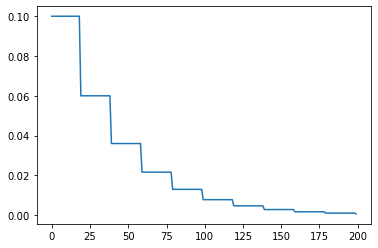

In [14]:
plt.plot(np.arange(200), 0.1*np.power(0.6, np.floor((1 + np.arange(200))/20)))

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.show()

In [ ]:
def plot_series(time, series, label, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)
    plt.legend()

In [ ]:
forecast=[]
for time in range(len(series) - window_size):
  pred = model.predict(series[time:time + window_size][np.newaxis])
  # rescaled_pred = scaler2.inverse_transform(pred)
  # pred = pred / 100.
  forecast.append(pred)

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid[:, 0], "real")
plot_series(time_valid, results, "predicted")

In [ ]:
tf.keras.metrics.mean_absolute_error(x_valid[:, 0], results).numpy()

In [ ]:
model.predict(series[-window_size:][np.newaxis])[0, 0] - model.predict(series[-window_size-1:-1][np.newaxis])[0, 0]

In [ ]:
scaler2 = MinMaxScaler()
scaler2.min_ = scaler.min_[0]
scaler2.scale_ = scaler.scale_[0]
print(scaler2.inverse_transform(model.predict(series[-window_size-1:-1][np.newaxis]))[0, 0])
print(scaler2.inverse_transform(model.predict(series[-window_size:][np.newaxis]))[0, 0])